In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('../dataset/Algerian_forest_fires_dataset.csv')
original_df = df.copy()
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df = df.drop(['day', 'month', 'year'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
## Encoding the target variable
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [26]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [27]:
## Independent and Dependent Features
X = df.drop('FWI', axis=1)
Y = df['FWI']

In [28]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [29]:
## Feature Selection 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

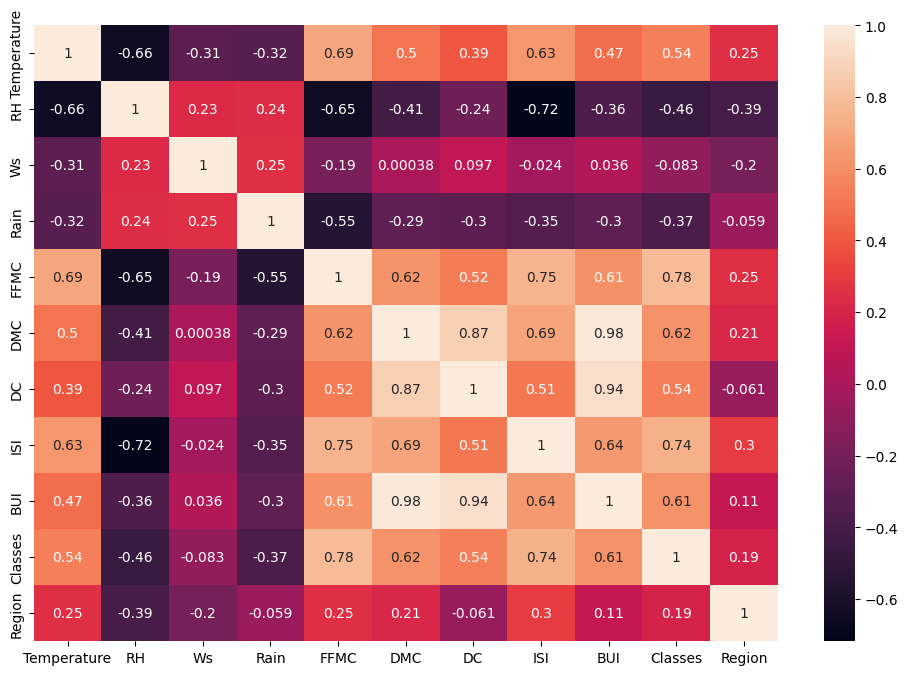

In [30]:
## Check for multicollinearity
plt.figure(figsize=(12,8))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [31]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
## threshold  --> domain experties
corr_features = correlation(X_train, 0.85)
print(corr_features)

{'BUI', 'DC'}


In [33]:
## drop these features when correlation is more than 0.85
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features, axis=1)

In [34]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


In [35]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [36]:
## Feature scalling or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'After Standardization')

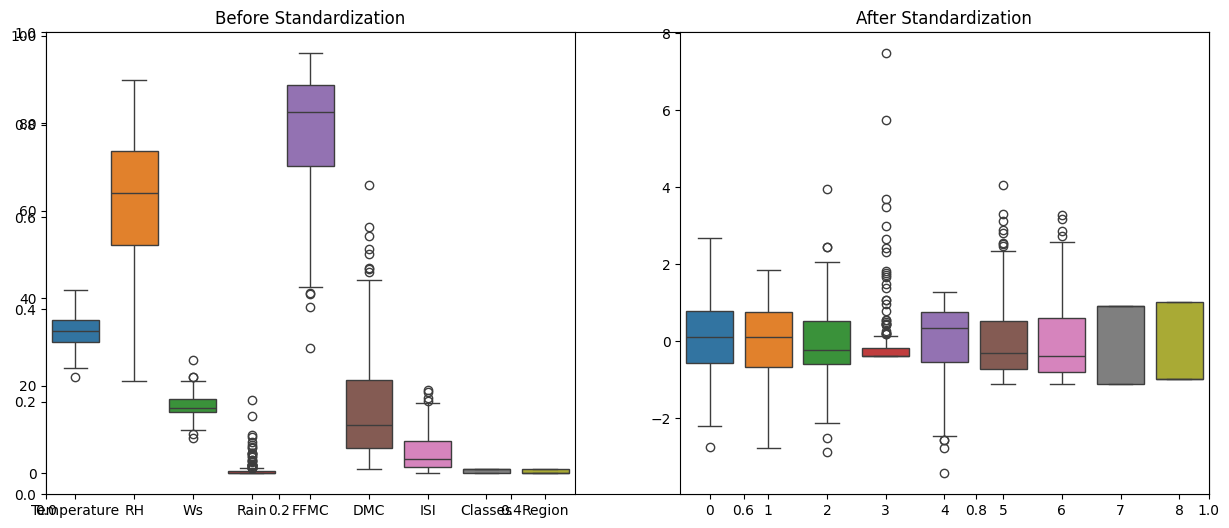

In [37]:
## Box plots to understand the effect of standard scaler
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Before Standardization')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('After Standardization')

# Linear Regression Setup

MAE: 0.546823646525
R2 Score: 0.9847657384266951


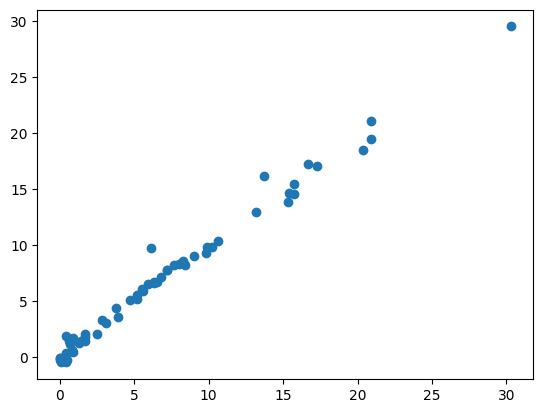

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


regressor = LinearRegression()
regressor.fit(X_train_scaled, Y_train)
mae = mean_absolute_error(Y_test, regressor.predict(X_test_scaled))
score = r2_score(Y_test, regressor.predict(X_test_scaled))
print("MAE:", mae)
print("R2 Score:", score)

plt.scatter(Y_test, regressor.predict(X_test_scaled))

MAE: 1.1331759949144087
R2 Score: 0.9492020263112388


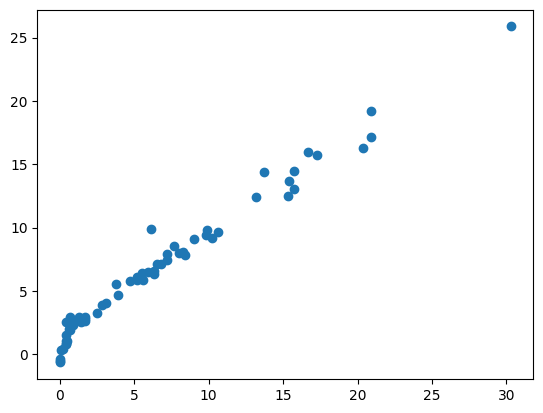

In [39]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


lasso_regressor = Lasso()
lasso_regressor.fit(X_train_scaled, Y_train)
mae = mean_absolute_error(Y_test, lasso_regressor.predict(X_test_scaled))
score = r2_score(Y_test, lasso_regressor.predict(X_test_scaled))
print("MAE:", mae)
print("R2 Score:", score)

plt.scatter(Y_test, lasso_regressor.predict(X_test_scaled))

MAE: 0.6358894638564663
R2 Score: 0.9814406737205228


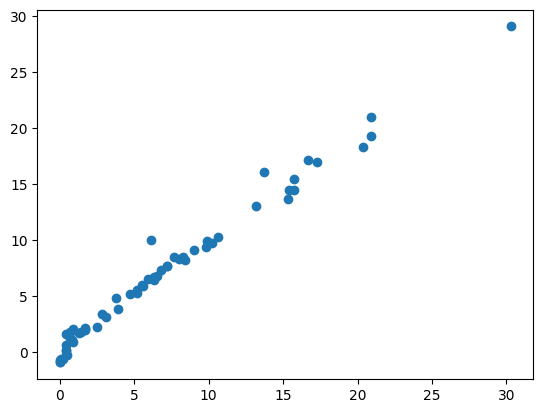

In [40]:
## LassoCV
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, Y_train)
y_pred_lasso = lassocv.predict(X_test_scaled)
plt.scatter(Y_test, y_pred_lasso)
mae = mean_absolute_error(Y_test, y_pred_lasso)
score = r2_score(Y_test, y_pred_lasso)
print("MAE:", mae)
print("R2 Score:", score)


In [41]:
print(lassocv.get_params())
len(lassocv.alphas_)


{'alphas': 'warn', 'copy_X': True, 'cv': 5, 'eps': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'n_alphas': 'deprecated', 'n_jobs': None, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}


100

MAE: 0.5642305340105713
R2 Score: 0.9842993364555512


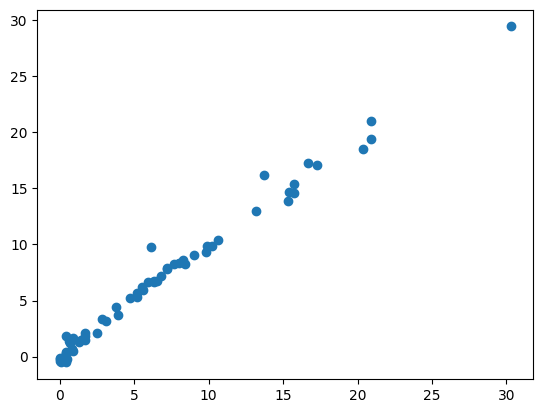

In [42]:
## Ridge Regressoin 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score


ridge_regressor = Ridge()
ridge_regressor.fit(X_train_scaled, Y_train)
mae = mean_absolute_error(Y_test, ridge_regressor.predict(X_test_scaled))
score = r2_score(Y_test, ridge_regressor.predict(X_test_scaled))
print("MAE:", mae)
print("R2 Score:", score)

plt.scatter(Y_test, ridge_regressor.predict(X_test_scaled))

MAE: 0.5642305340105713
R2 Score: 0.9842993364555512


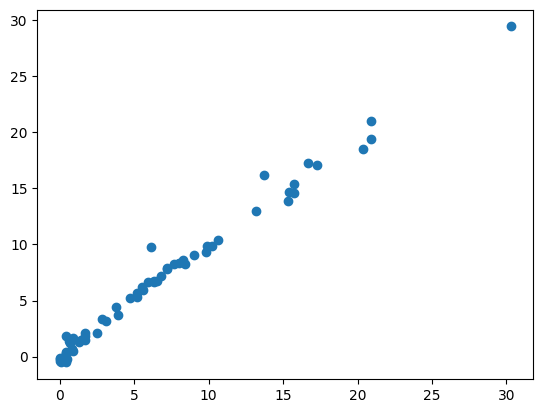

In [43]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, Y_train)
y_pred_ridgecv = ridgecv.predict(X_test_scaled)
plt.scatter(Y_test, y_pred_ridgecv)
mae = mean_absolute_error(Y_test, y_pred_ridgecv)
score = r2_score(Y_test, y_pred_ridgecv)
print("MAE:", mae)
print("R2 Score:", score)


In [44]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

MAE: 1.8822353634896003
R2 Score: 0.8753460589519703


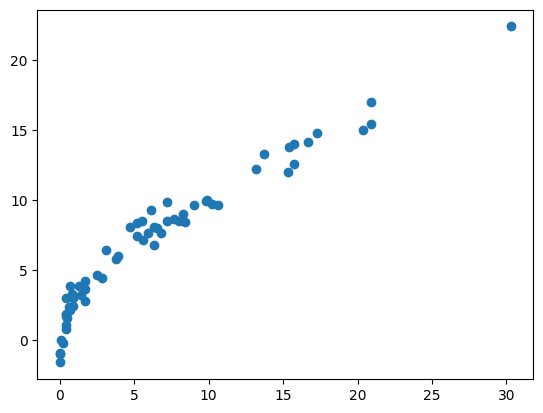

In [45]:
## Elastic Net Regression
## Ridge Regressoin 
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score


eleastic_net_regressor = ElasticNet()
eleastic_net_regressor.fit(X_train_scaled, Y_train)
mae = mean_absolute_error(Y_test, eleastic_net_regressor.predict(X_test_scaled))
score = r2_score(Y_test, eleastic_net_regressor.predict(X_test_scaled))
print("MAE:", mae)
print("R2 Score:", score)

plt.scatter(Y_test, eleastic_net_regressor.predict(X_test_scaled))

## Cross-Validation using ElasticNetCV

MAE: 0.6575946731430902
R2 Score: 0.9814217587854941


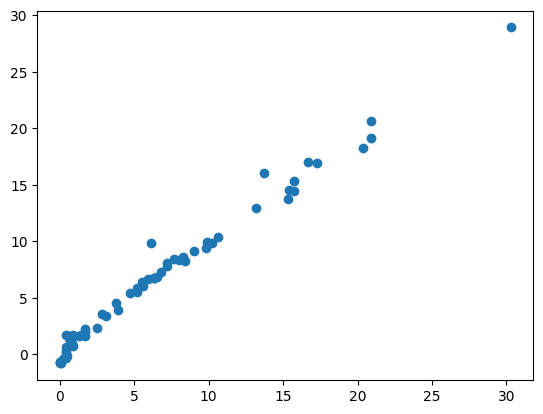

In [46]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5)
elastic_net_cv.fit(X_train_scaled, Y_train)
y_pred_elasticnetcv = elastic_net_cv.predict(X_test_scaled)
plt.scatter(Y_test, y_pred_elasticnetcv)
mae = mean_absolute_error(Y_test, y_pred_elasticnetcv)
score = r2_score(Y_test, y_pred_elasticnetcv)
print("MAE:", mae)
print("R2 Score:", score)


In [47]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [48]:
original_df['Classes'] = np.where(original_df['Classes'].str.contains('not fire'), 'not fire', 'fire')

In [49]:
original_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


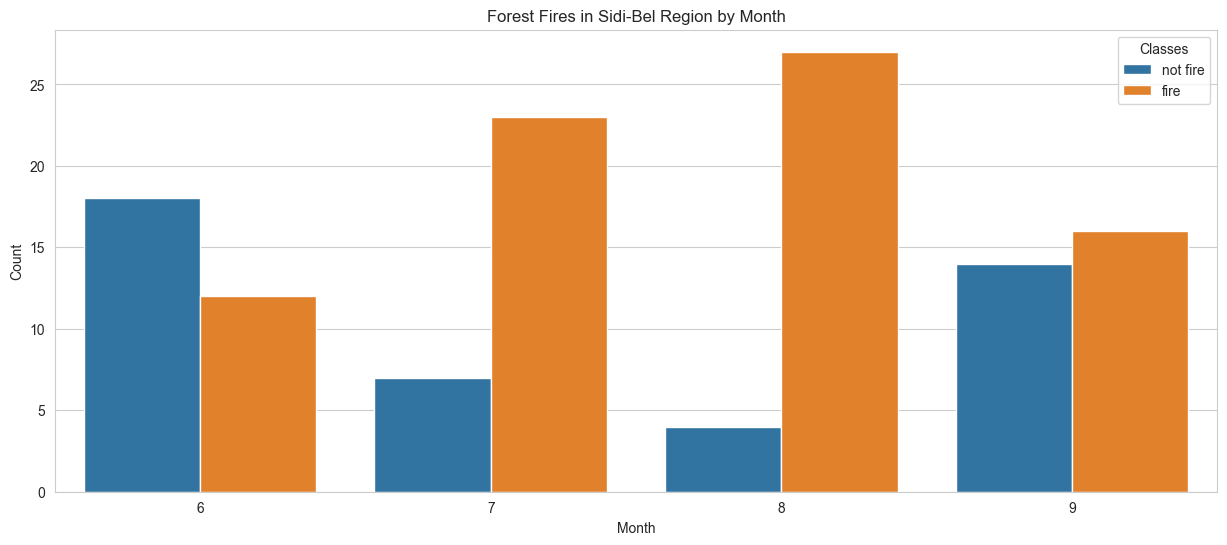

In [50]:
dftemp = original_df.loc[df['Region'] == 1]
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')

sns.countplot(
    x='month',
    hue='Classes',
    data=dftemp
)

plt.title('Forest Fires in Sidi-Bel Region by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

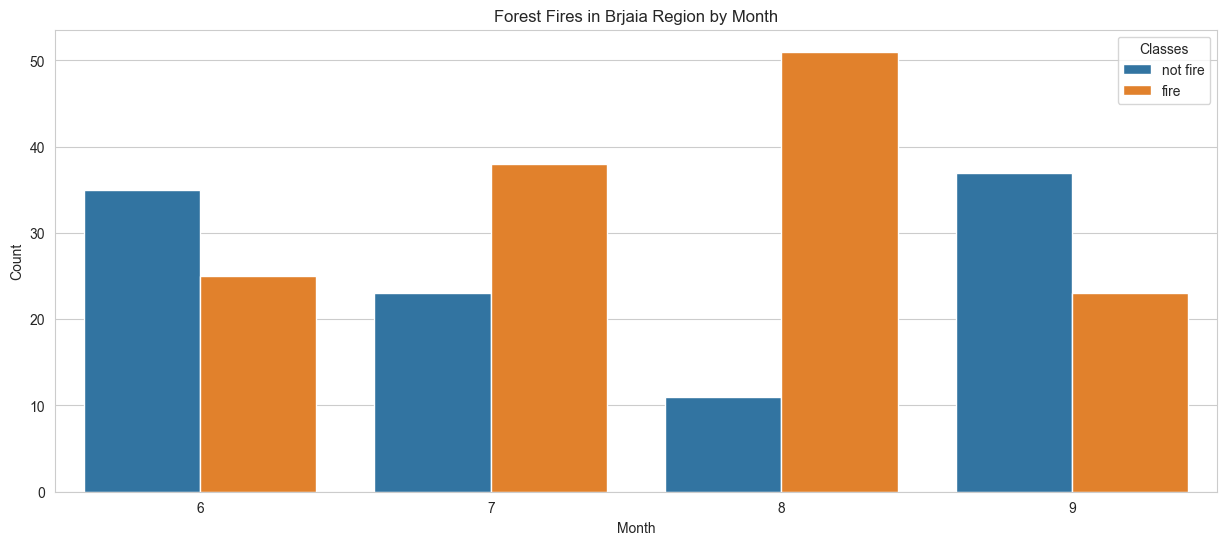

In [51]:
dftemp = original_df.loc[df['Region'] == 0]
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')

sns.countplot(
    x='month',
    hue='Classes',
    data=original_df
)

plt.title('Forest Fires in Brjaia Region by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Pickle the Machine Learning Models, also preprocessing model standardscaler

In [52]:
scaler

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [53]:
ridge_regressor

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [55]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge_regressor, open('ridge_regressor_model.pkl', 'wb'))